In [18]:
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris
import numpy as np                              # ndarrys for gridded data
import pandas as pd                             # DataFrames for tabular data
import matplotlib.pyplot as plt                 # For plotting
import seaborn as sns                           # For matrix scatter plots
from scipy import stats                         # Summary statistics and statistical methods
sns.set(font_scale=0.8)
import math

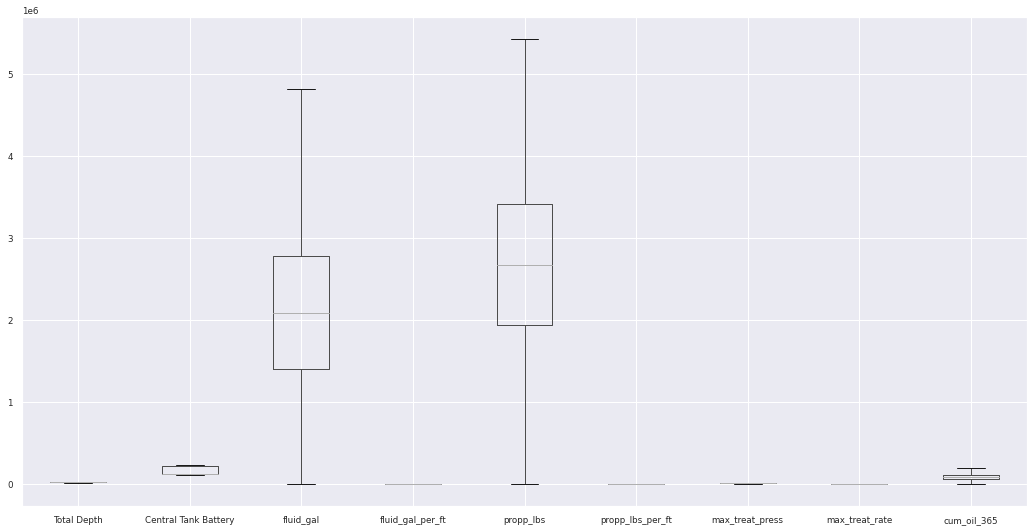

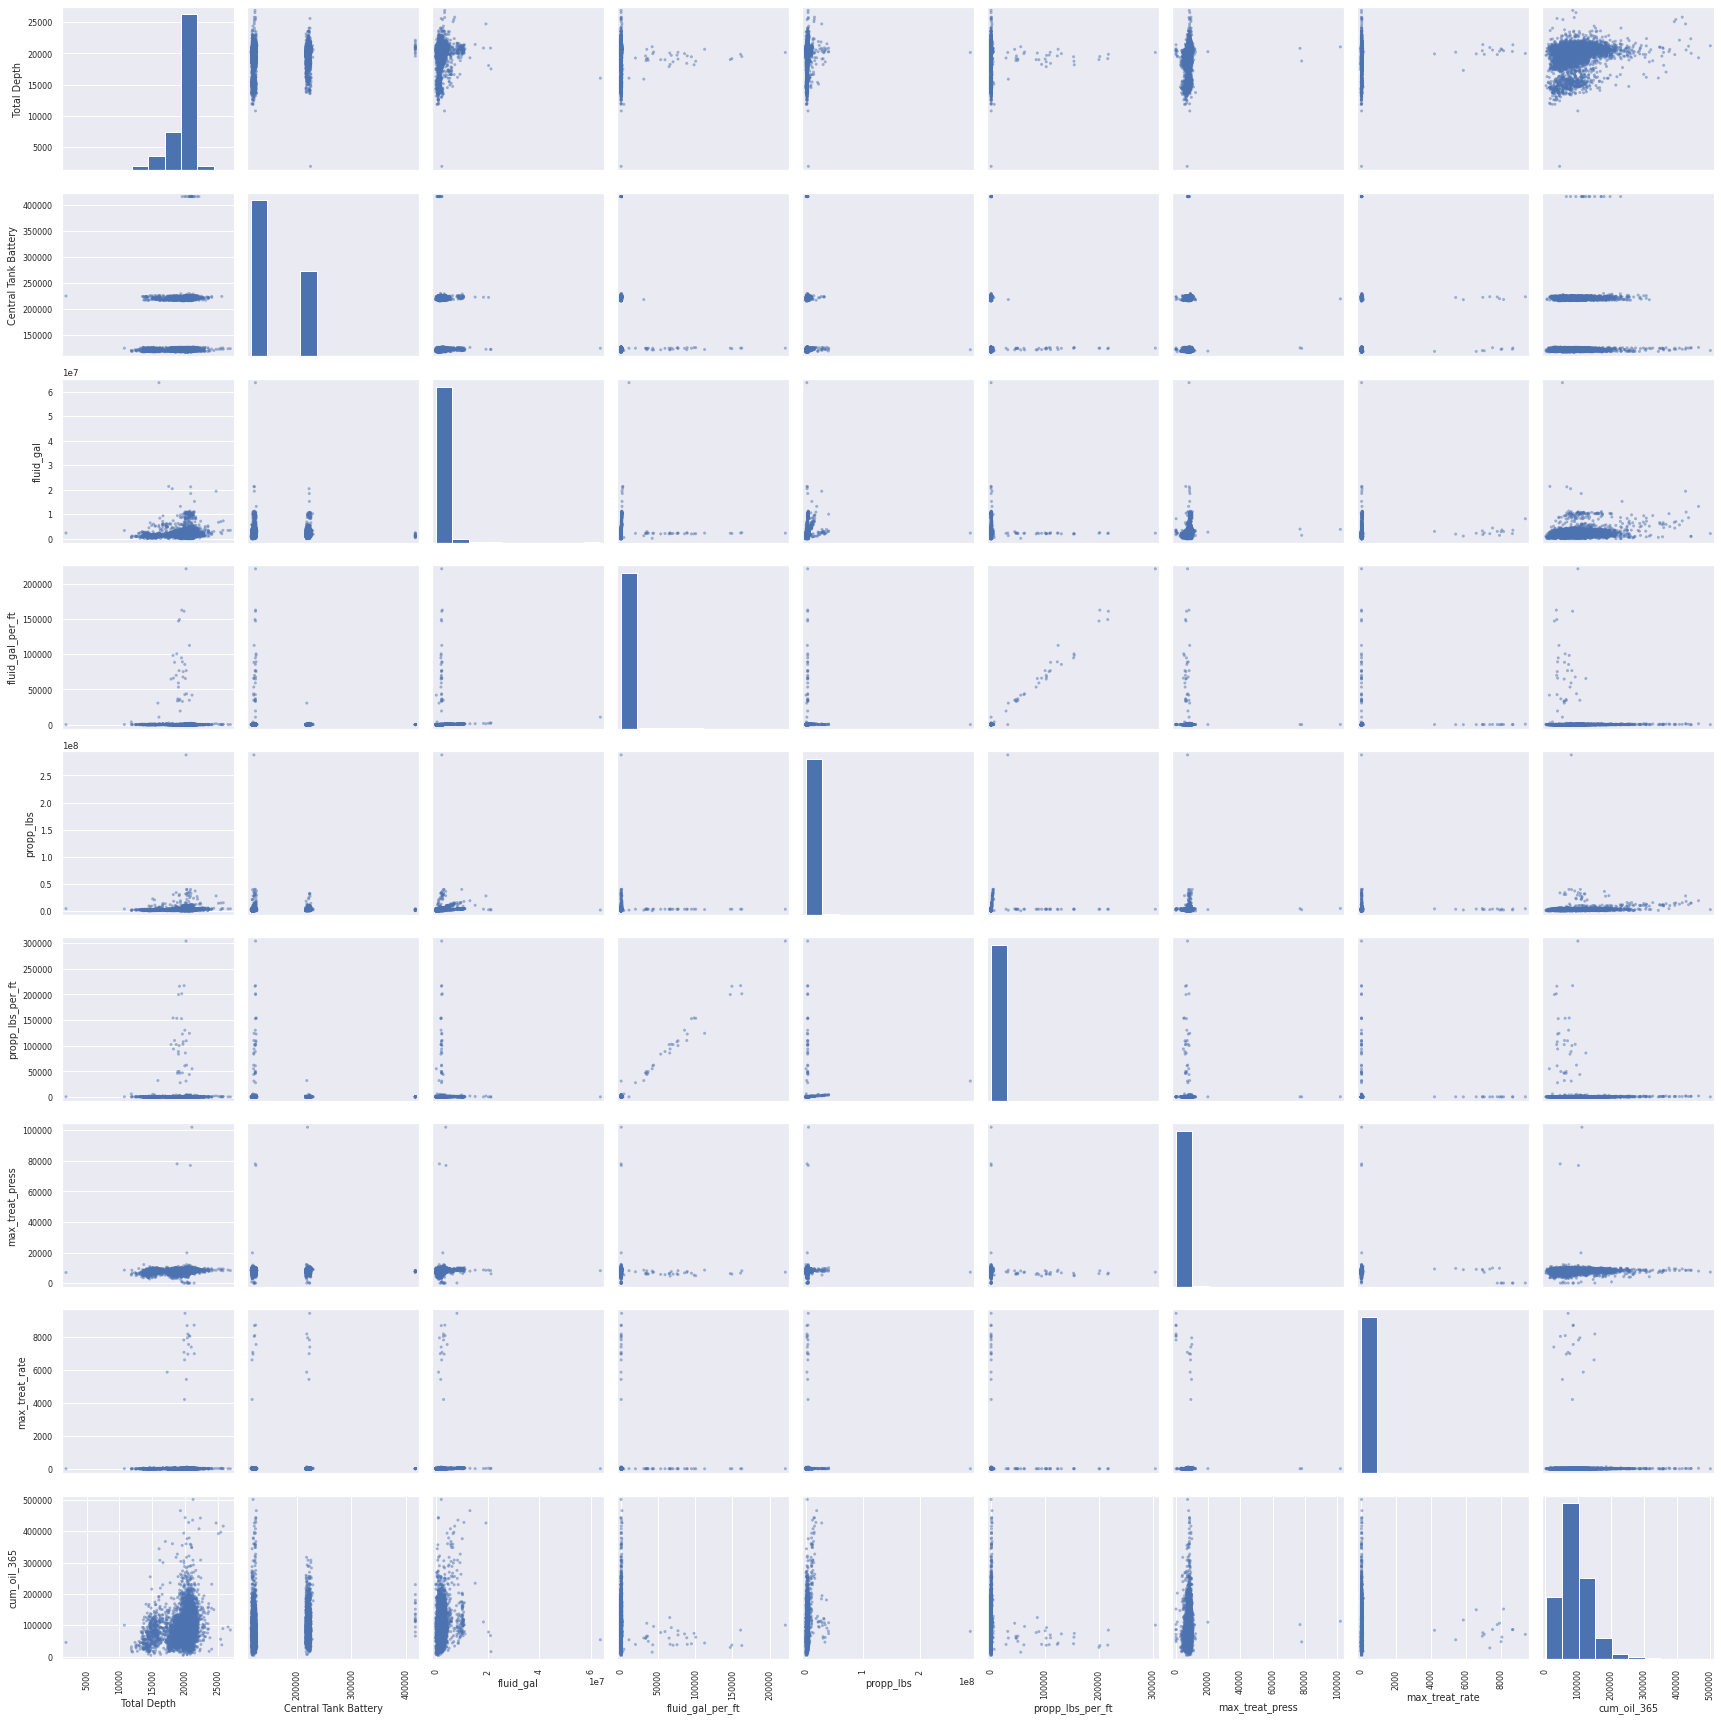

<Figure size 432x288 with 0 Axes>

In [37]:
bakken = pd.read_csv('Structured_Bakken_Production_Data.csv')
bakken.head()
bakken = bakken.dropna()
is_NaN = bakken.isnull()
#Get the features (0:7) and then use describe on that to get the descriptive statistics
bakken.iloc[:,0:7].describe()
covariance_matrix = bakken.iloc[:,0:7].cov()
bakken.boxplot(figsize = (18,9),showfliers=False)
pd.plotting.scatter_matrix(bakken,figsize = (24,24))
plt.tight_layout()
plt.show()
plt.clf()

In [38]:
t_statistic, p_value = stats.ttest_ind(bakken['max_treat_press'],bakken['Total Depth'])
print ("t-statistic = ", t_statistic)
print ("p-value = ", p_value)
if p_value < 0.05:
    print("We reject the Null Hypothesis")
else:
    print("We don't reject the Null Hypothesis")

t-statistic =  -280.3432415398243
p-value =  0.0
We reject the Null Hypothesis


In [39]:
def ecdf(data, x):
    """ Compute ECDF """
    y = np.zeros_like(x)
    
    for i, x_i in enumerate(x):
        y[i] = np.sum(data <= x_i)
        
    #Normalize by the number of samples
    y/=len(data)
    
    return y

In [40]:
def Komolgorov_Smirnov(sample_1,sample_2):
    ecdf1 = ecdf(sample_1,np.linspace(0, 2000, 5000))
    ecdf2 = ecdf(sample_2,np.linspace(0, 2000, 5000))
    return(max(abs(ecdf1 - ecdf2)))

In [41]:
#Use this as the x values for plotting and for the function below
sample1 = bakken['fluid_gal_per_ft']
sample2 = bakken['propp_lbs_per_ft']
D_m_n =  Komolgorov_Smirnov(sample1,sample2)

In [42]:
n = sample1.size
m = sample2.size
compare_D_m_n = 1.358*math.sqrt((n+m)/(n*m))
print(D_m_n)
if D_m_n>compare_D_m_n:
    print('We reject the null hypothesis')
else:
    print('We do not reject the null hypothesis')

0.27173693766390966
We reject the null hypothesis


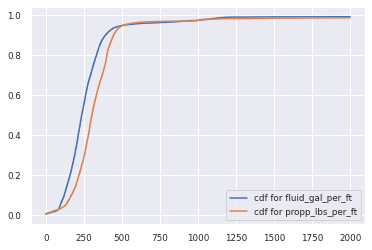

In [43]:
x = np.linspace(0, 2000, 5000)
fig, ax = plt.subplots()
ax.plot(x,ecdf(sample_1,x),label = 'cdf for fluid_gal_per_ft')
ax.plot(x,ecdf(sample_2,x),label = 'cdf for propp_lbs_per_ft')
ax.legend()